In [345]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


In [346]:
df = pd.read_csv('train.csv')

In [347]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [348]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [349]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Data analysis

In [350]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Embarked', ylabel='Survived'>

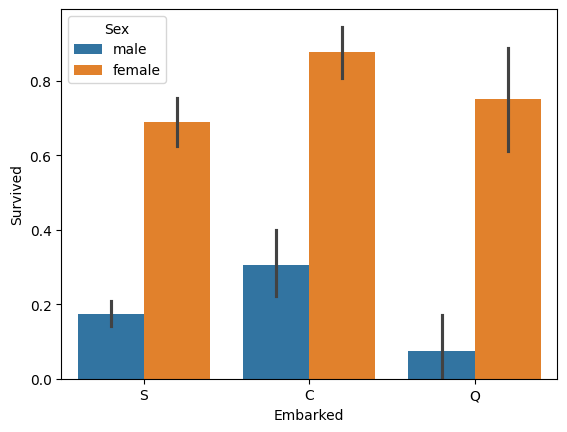

In [351]:
import seaborn as sns
sns.barplot(data = df, x = 'Embarked', y = 'Survived',hue = 'Sex')

<Axes: xlabel='Sex', ylabel='Survived'>

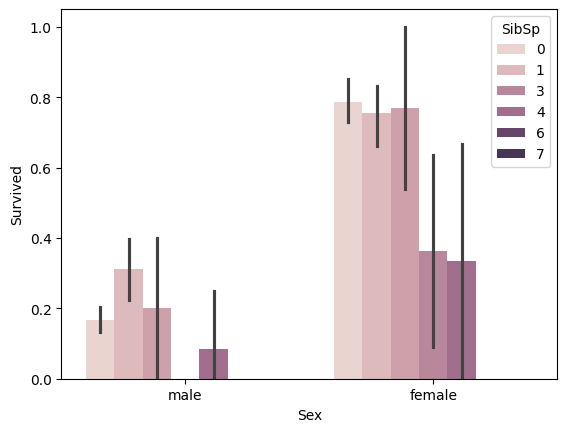

In [352]:
sns.barplot(data = df, x = 'Sex',y = 'Survived',hue = 'SibSp')

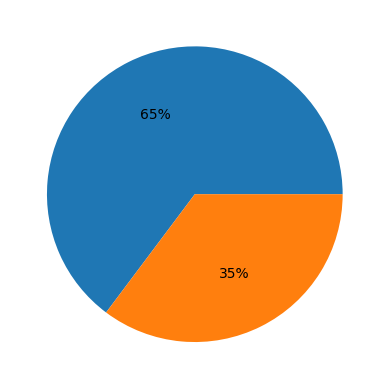

In [353]:
import matplotlib.pyplot as plt

sex = df['Sex'].value_counts()

plt.pie(sex,autopct='%1.0f%%')

plt.show()

# Train Test split

In [354]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['Survived']),df['Survived'],test_size = 0.2,random_state = 42)

In [355]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [356]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [358]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Handling missing values

In [359]:
si_age = SimpleImputer()
X_train['Age'] = si_age.fit_transform(X_train[['Age']])
X_test['Age'] = si_age.transform(X_test[['Age']])

In [360]:
si_emb = SimpleImputer(strategy  = 'most_frequent')
X_train['Embarked'] = si_emb.fit_transform(X_train[['Embarked']])
X_test['Embarked'] = si_emb.transform(X_test[['Embarked']])



In [361]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Encoding part

In [362]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


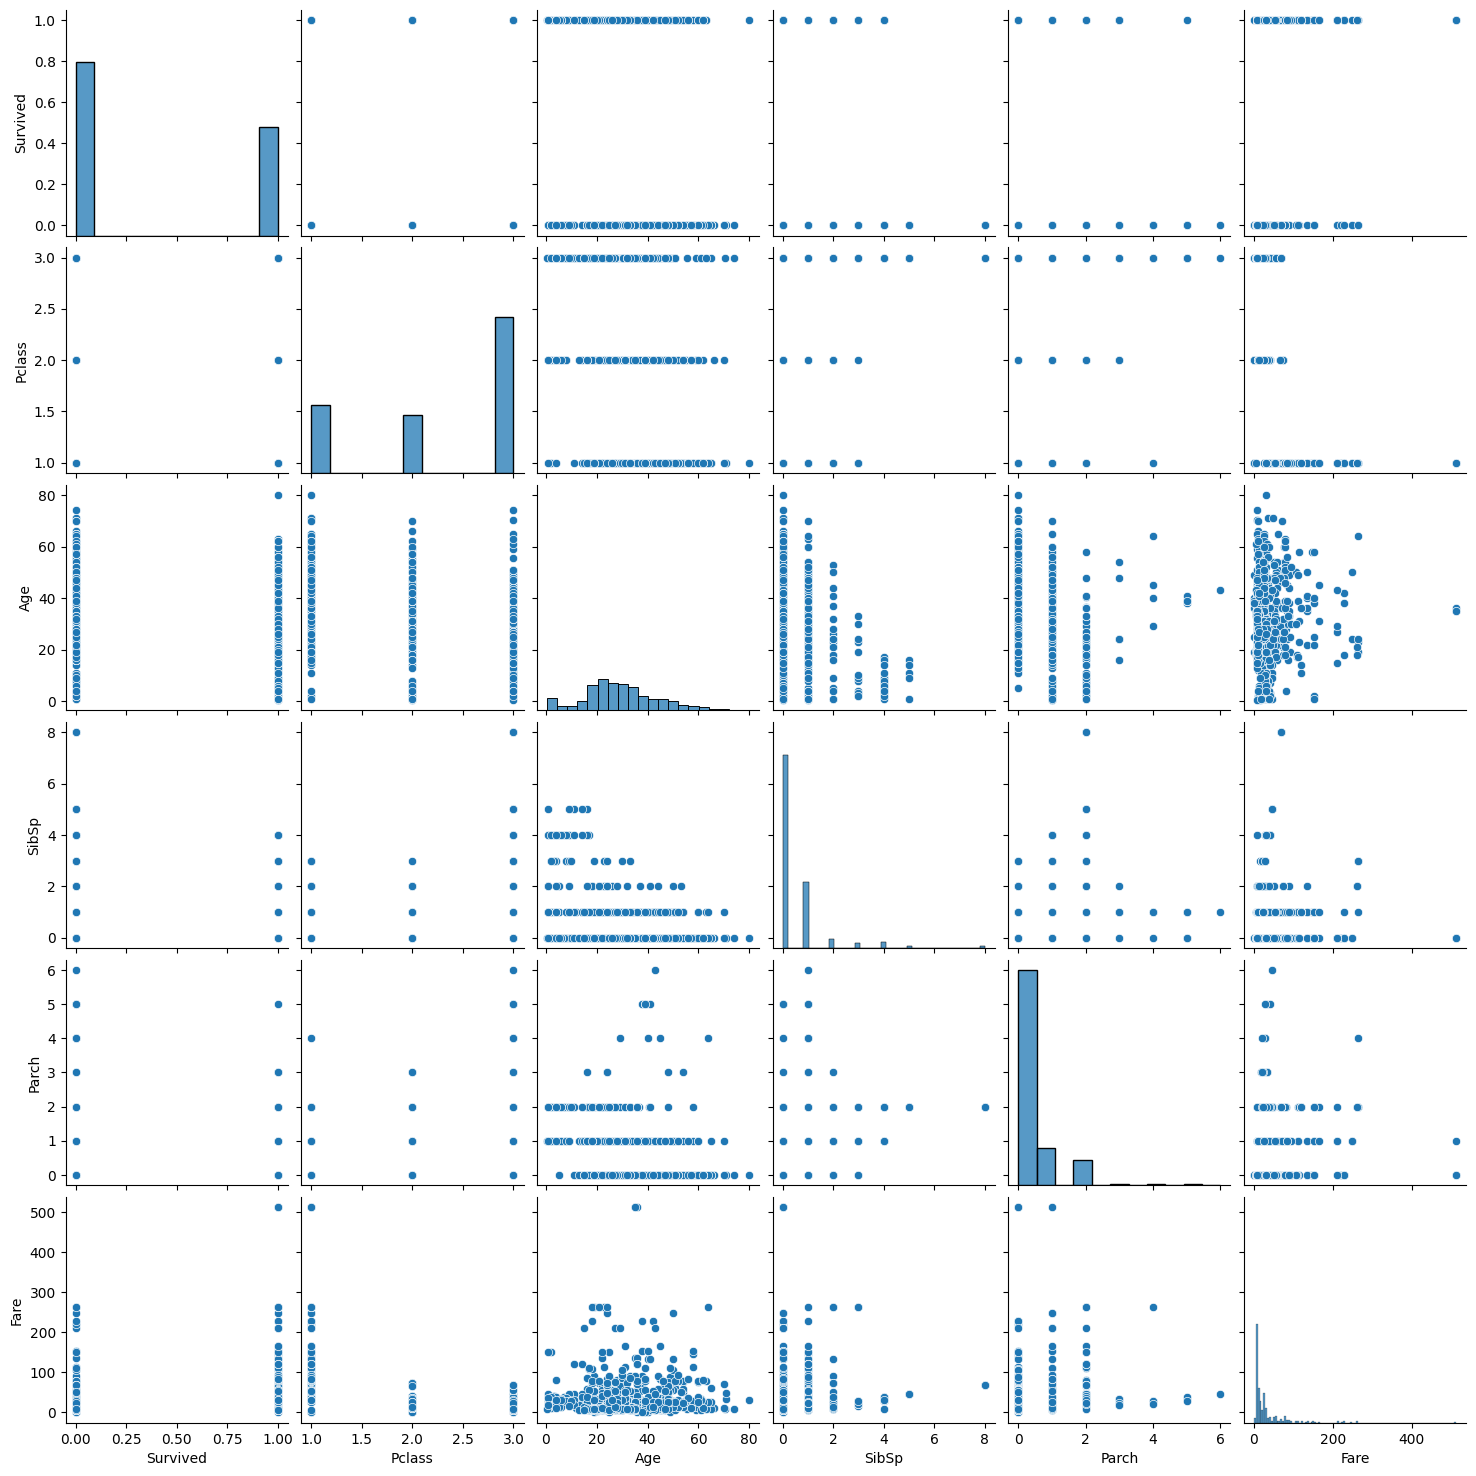

In [382]:
sns.pairplot(df)

<Axes: xlabel='Fare'>

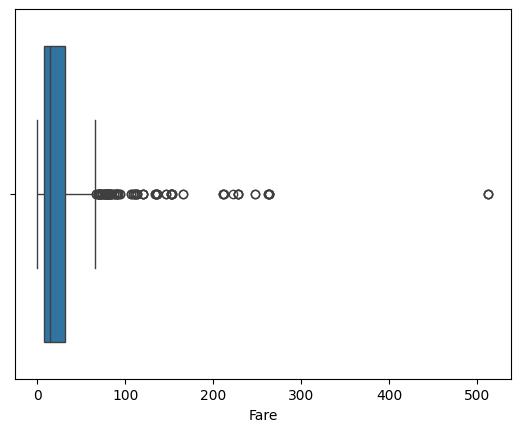

In [381]:
sns.boxplot(data = df, x = 'Fare')

In [364]:
ohe = OneHotEncoder()

X_train[['female_gender','male_gender']] = ohe.fit_transform(X_train[['Sex']]).toarray()

X_test[['female_gender','male_gender']] = ohe.transform(X_test[['Sex']]).toarray()


In [365]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female_gender,male_gender
331,1,male,45.5,0,0,28.5000,S,0.0,1.0
733,2,male,23.0,0,0,13.0000,S,0.0,1.0
382,3,male,32.0,0,0,7.9250,S,0.0,1.0
704,3,male,26.0,1,0,7.8542,S,0.0,1.0
813,3,female,6.0,4,2,31.2750,S,1.0,0.0


In [366]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female_gender,male_gender
709,3,male,29.498846,1,1,15.2458,C,0.0,1.0
439,2,male,31.000000,0,0,10.5000,S,0.0,1.0
840,3,male,20.000000,0,0,7.9250,S,0.0,1.0
720,2,female,6.000000,0,1,33.0000,S,1.0,0.0
39,3,female,14.000000,1,0,11.2417,C,1.0,0.0
...,...,...,...,...,...,...,...,...,...
433,3,male,17.000000,0,0,7.1250,S,0.0,1.0
773,3,male,29.498846,0,0,7.2250,C,0.0,1.0
25,3,female,38.000000,1,5,31.3875,S,1.0,0.0
84,2,female,17.000000,0,0,10.5000,S,1.0,0.0


In [367]:
X_train['Embarked'].value_counts()

S    527
C    125
Q     60
Name: Embarked, dtype: int64

In [368]:
ohe1 = OneHotEncoder()

In [369]:
X_train[['c_emb','q_emb','s_emb']] = ohe.fit_transform(X_train[['Embarked']]).toarray()

X_test[['c_emb','q_emb','s_emb']] = ohe.transform(X_test[['Embarked']]).toarray()

In [370]:
X_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female_gender,male_gender,c_emb,q_emb,s_emb
365,3,male,30.000000,0,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
746,3,male,16.000000,1,1,20.2500,S,0.0,1.0,0.0,0.0,1.0
287,3,male,22.000000,0,0,7.8958,S,0.0,1.0,0.0,0.0,1.0
463,2,male,48.000000,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
183,2,male,1.000000,2,1,39.0000,S,0.0,1.0,0.0,0.0,1.0
55,1,male,29.498846,0,0,35.5000,S,0.0,1.0,0.0,0.0,1.0
217,2,male,42.000000,1,0,27.0000,S,0.0,1.0,0.0,0.0,1.0
216,3,female,27.000000,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
125,3,male,12.000000,1,0,11.2417,C,0.0,1.0,1.0,0.0,0.0
473,2,female,23.000000,0,0,13.7917,C,1.0,0.0,1.0,0.0,0.0


In [371]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

# Scaling

Text(0.5, 1.0, 'before scaling')

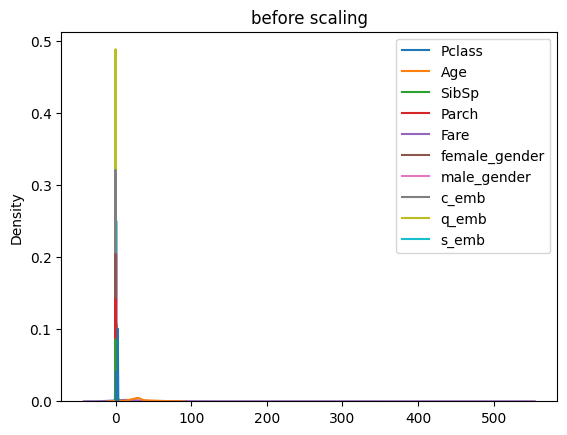

In [372]:
import matplotlib.pyplot as plt

sns.kdeplot(X_train)
plt.title('before scaling')

In [373]:
scaler = MinMaxScaler()
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])
X_test['Fare'] = scaler.transform(X_test[['Fare']])




Text(0.5, 1.0, 'after scaling')

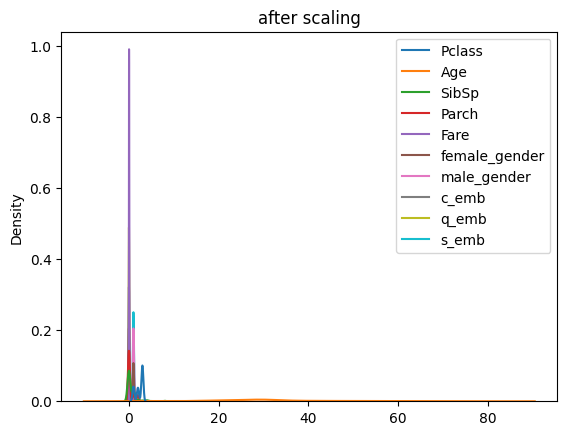

In [374]:
sns.kdeplot(X_train)
plt.title('after scaling')

In [375]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female_gender,male_gender,c_emb,q_emb,s_emb
331,1,male,45.500000,0,0,0.055628,S,0.0,1.0,0.0,0.0,1.0
733,2,male,23.000000,0,0,0.025374,S,0.0,1.0,0.0,0.0,1.0
382,3,male,32.000000,0,0,0.015469,S,0.0,1.0,0.0,0.0,1.0
704,3,male,26.000000,1,0,0.015330,S,0.0,1.0,0.0,0.0,1.0
813,3,female,6.000000,4,2,0.061045,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,0.014932,S,1.0,0.0,0.0,0.0,1.0
270,1,male,29.498846,0,0,0.060508,S,0.0,1.0,0.0,0.0,1.0
860,3,male,41.000000,2,0,0.027538,S,0.0,1.0,0.0,0.0,1.0
435,1,female,14.000000,1,2,0.234224,S,1.0,0.0,0.0,0.0,1.0


In [376]:
X_train.drop(columns = ['Sex','Embarked'],inplace=True)
X_test.drop(columns = ['Sex','Embarked'],inplace=True)

# Now we ready for training the dataset

In [377]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [378]:
y_pred = clf.predict(X_test)

In [379]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

# Calculate accuracy score

In [380]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7988826815642458